# Required Lab -- week of March 19th -- 23rd

Make an animated plot in matplotlib that recreates an analogue clock. 

Make the minute and hour markers in black.  Put numbers (text field) at the hour markers.  Make the hour hand short and fat, the minute hand long and thin, both in black.  Make the second hand in red. 

Set the time on your clock to local time -- use the **time** library. 

Make both a (normal) 12-hour version of your clock, and a 24-hour version. 

In [20]:
%matplotlib nbagg  
import matplotlib.pyplot as plt
import numpy as np
from matplotlib.widgets import Slider
import matplotlib.animation as animation

import time



<IPython.core.display.Javascript object>


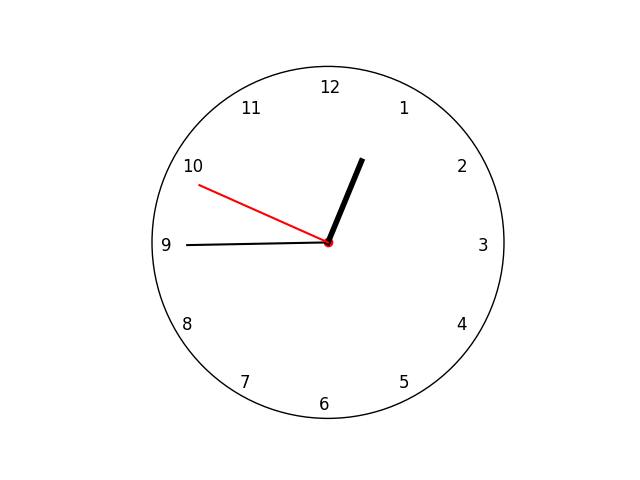

In [22]:
## let's now do an animated plot, to "see" the pendulum in action

plt.close()

fig, ax = plt.subplots()

## initial plot. bearing, initial arm, circle of radius 1.

circ = plt.Circle( (0.0, 0.0), 1.0, fill=False)
cent = plt.plot([0.0], [0.0], 'ro')
ax.add_artist(circ)
ax.set_xlim(-1.05, 1.05)
ax.set_ylim(-1.05, 1.05)
ax.set_aspect("equal")
ax.axis("off")

hr_mag = 0.5
min_mag = 0.8
sec_mag = 0.8

hour_theta = 0
min_theta = 0
sec_theta = 0

hour_hand, = plt.plot([0.0, hr_mag*np.sin(hour_theta)], [0.0, hr_mag*-np.cos(hour_theta)], color='black',linewidth = 4.)
min_hand, = plt.plot([0.0, min_mag*np.sin(min_theta)], [0.0, min_mag*-np.cos(min_theta)], color='black')
sec_hand, = plt.plot([0.0, sec_mag*np.sin(sec_theta)], [0.0, sec_mag*-np.cos(sec_theta)], 'r')

nums = ['0','1','2','3','4','5','6','7','8','9','10','11','12']
for i in range(1,13):
    plt.text(0.9*np.cos(np.pi/2 - i*2*np.pi/12)-0.05, 0.9*np.sin(np.pi/2 - i*2*np.pi/12)-0.05, nums[i], fontsize=12)



#def init():
#    hour_hand.set_xdata( [0.0, hr_mag*np.sin(hour_theta)] )
#    hour_hand.set_ydata( [0.0, hr_mag*-np.cos(hour_theta)])
#    min_hand.set_xdata( [0.0, min_mag*np.sin(min_theta)] )
#    min_hand.set_ydata( [0.0, min_mag*-np.cos(min_theta)])
#    sec_hand.set_xdata( [0.0, sec_mag*np.sin(sec_theta)] )
#    sec_hand.set_ydata( [0.0, sec_mag*-np.cos(sec_theta)])
#    return hour_hand, min_hand, sec_hand 



def update():
    now = time.localtime()
    hour = float(now.tm_hour - 7) + now.tm_min/60.0 + now.tm_sec/(60.0*60.0)
    minu = now.tm_min + now.tm_sec/60.0
    sec = now.tm_sec
    
    hour_theta = np.pi - (2*np.pi/12)*hour
    min_theta = np.pi - (2*np.pi/60)*minu
    sec_theta = np.pi - (2*np.pi/60)*sec

    hour_hand.set_xdata( [0.0, hr_mag*np.sin(hour_theta)])
    hour_hand.set_ydata( [0.0, hr_mag*-np.cos(hour_theta)])
    
    min_hand.set_xdata( [0.0, min_mag*np.sin(min_theta)])
    min_hand.set_ydata( [0.0, min_mag*-np.cos(min_theta)])
    
    sec_hand.set_xdata( [0.0, sec_mag*np.sin(sec_theta)])
    sec_hand.set_ydata( [0.0, sec_mag*-np.cos(sec_theta)])
    
    #return hour_hand, min_hand, sec_hand
    
def init():
    update()
    return [hour_hand, min_hand, sec_hand]
    
def animate(i):
    update()
    return [hour_hand, min_hand, sec_hand]
    
## interval is ms delay between frames
ani = animation.FuncAnimation( fig, animate, init_func=init, interval=200,\
                               blit=True )


plt.show()